In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageEnhance

2022-03-16 14:40:56.247684: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
directory = '../input/state-farm-distracted-driver-detection/imgs/train'
test_directory = '../input/state-farm-distracted-driver-detection/imgs/test'
random_test = '../input/driver/'
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

In [3]:
img_size1 = 240
img_size2 = 240

In [4]:
training_data = []
i = 0
def create_training_data():
    for category in classes:
        path = os.path.join(directory,category)
        class_num = classes.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img_array,(img_size2,img_size1))
            training_data.append([
                new_img,class_num])


In [5]:
testing_data = []
i = 0
def create_testing_data():        
    for img in os.listdir(test_directory):
        img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img_array,(img_size2,img_size1))
        testing_data.append([img,
            new_img])

In [6]:
import cv2

In [7]:
create_training_data()

In [8]:
create_testing_data()

In [9]:
import random

In [10]:
random.shuffle(training_data)

In [11]:
x = []
y = []

In [12]:
for features, label in training_data:
    x.append(features)
    y.append(label)

In [13]:
from sklearn.model_selection import train_test_split
X = np.array(x).reshape(-1,img_size2,img_size1,1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)

In [14]:
Y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
Y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)

In [15]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(240,240,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.BatchNormalization(axis = 3))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.BatchNormalization(axis = 3))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.BatchNormalization(axis = 3))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units = 512,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

2022-03-16 14:56:50.461687: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-16 14:56:50.466096: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-16 14:56:50.511726: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-16 14:56:50.512440: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-03-16 14:56:50.512499: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-03-16 14:56:50.555843: I tensorflow/stream_executor/platform/def

In [16]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [17]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_acc',patience=5)]

In [18]:
batch_size = 50
n_epochs = 10

In [19]:
results = model.fit(x_train,Y_train,batch_size=batch_size,epochs=n_epochs,verbose=1,validation_data=(x_test,Y_test),callbacks=callbacks)

2022-03-16 14:56:52.674048: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 904089600 exceeds 10% of free system memory.
2022-03-16 14:56:53.647443: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-16 14:56:53.658186: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000155000 Hz


Epoch 1/10


2022-03-16 14:56:54.817504: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-03-16 14:56:55.603473: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-03-16 14:56:55.629328: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


314/314 [==============================] - ETA: 0s - loss: 1.4607 - accuracy: 0.5496

2022-03-16 14:57:52.150449: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 387532800 exceeds 10% of free system memory.


314/314 [==============================] - 65s 177ms/step - loss: 1.4584 - accuracy: 0.5503 - val_loss: 0.0989 - val_accuracy: 0.9704
Epoch 2/10
314/314 [==============================] - 52s 167ms/step - loss: 0.1349 - accuracy: 0.9595 - val_loss: 0.0575 - val_accuracy: 0.9842
Epoch 3/10
314/314 [==============================] - 52s 167ms/step - loss: 0.0750 - accuracy: 0.9766 - val_loss: 0.0440 - val_accuracy: 0.9890
Epoch 4/10
314/314 [==============================] - 52s 166ms/step - loss: 0.0674 - accuracy: 0.9793 - val_loss: 0.1588 - val_accuracy: 0.9530
Epoch 5/10
314/314 [==============================] - 52s 166ms/step - loss: 0.0409 - accuracy: 0.9861 - val_loss: 0.0670 - val_accuracy: 0.9825
Epoch 6/10
314/314 [==============================] - 52s 166ms/step - loss: 0.0488 - accuracy: 0.9837 - val_loss: 0.0337 - val_accuracy: 0.9915
Epoch 7/10
314/314 [==============================] - 52s 166ms/step - loss: 0.1062 - accuracy: 0.9660 - val_loss: 1.5924 - val_accuracy: 0.6

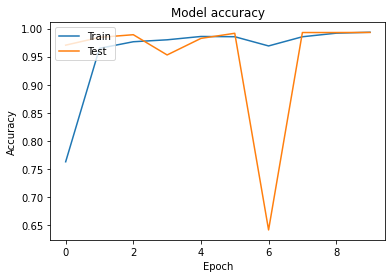

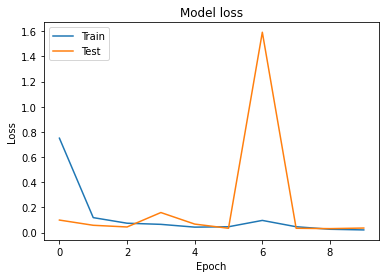

In [21]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
preds = model.predict(np.array(testing_data[0][1]).reshape(-1,img_size2,img_size1,1))

In [23]:
model.save_weights('./driverdistraction_lr_weights.h5', overwrite=True)

2022-03-16 15:07:06.914288: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 235929600 exceeds 10% of free system memory.


In [24]:
model.save('./driverdistraction_lr_weights.h5')

2022-03-16 15:07:46.831606: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 235929600 exceeds 10% of free system memory.
2022-03-16 15:07:47.456247: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 235929600 exceeds 10% of free system memory.


In [29]:
loaded_model = tf.keras.models.load_model('./driverdistraction_lr_weights.h5')

In [30]:
test_data = np.array(testing_data[3000][1]).reshape(-1,img_size2,img_size1,1)

In [31]:
preds = loaded_model.predict(test_data)

In [32]:
print('Predicted: {}'.format(np.argmax(preds)))

Predicted: 5


In [33]:
testing_data[1]

['img_32366.jpg',
 array([[ 16,  16,  16, ..., 219, 235, 239],
        [ 16,  16,  16, ..., 200, 216, 231],
        [ 16,  16,  16, ..., 193, 204, 217],
        ...,
        [ 13,  13,  13, ...,   9,  20,  65],
        [ 15,  15,  15, ...,   8,  18,  63],
        [ 15,  15,  15, ...,   7,  15,  58]], dtype=uint8)]

In [78]:
submission=None
submission=pd.DataFrame(columns=['img','c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'])

In [36]:
pd.read_csv('../input/state-farm-distracted-driver-detection/sample_submission.csv')

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,img_10.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,img_100.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,img_1000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,img_100000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
...,...,...,...,...,...,...,...,...,...,...,...
79721,img_99994.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
79722,img_99995.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
79723,img_99996.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
79724,img_99998.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [79]:
for  n,i in testing_data[:10000]:
    pred=model.predict(i.reshape(-1,img_size2,img_size1,1))
    one=(np.argmax(pred))
    row=[n,0,0,0,0,0,0,0,0,0,0]
    row[one+1]=1
    submission.loc[len(submission.index)] = row

submission
    

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_96590.jpg,0,0,0,0,0,0,0,0,1,0
1,img_32366.jpg,0,0,0,0,0,1,0,0,0,0
2,img_99675.jpg,0,1,0,0,0,0,0,0,0,0
3,img_85937.jpg,0,0,0,0,0,1,0,0,0,0
4,img_73903.jpg,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,img_9400.jpg,0,1,0,0,0,0,0,0,0,0
9996,img_39206.jpg,0,0,1,0,0,0,0,0,0,0
9997,img_11834.jpg,0,0,0,0,0,1,0,0,0,0
9998,img_91809.jpg,0,0,0,0,0,1,0,0,0,0


In [58]:
submission.to_csv('./submission.csv')

In [80]:
for  n,i in testing_data[10000:20000]:
    pred=model.predict(i.reshape(-1,img_size2,img_size1,1))
    one=(np.argmax(pred))
    row=[n,0,0,0,0,0,0,0,0,0,0]
    row[one+1]=1
    submission.loc[len(submission.index)] = row

submission

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_96590.jpg,0,0,0,0,0,0,0,0,1,0
1,img_32366.jpg,0,0,0,0,0,1,0,0,0,0
2,img_99675.jpg,0,1,0,0,0,0,0,0,0,0
3,img_85937.jpg,0,0,0,0,0,1,0,0,0,0
4,img_73903.jpg,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
19995,img_23122.jpg,0,1,0,0,0,0,0,0,0,0
19996,img_80072.jpg,0,0,0,0,0,1,0,0,0,0
19997,img_65113.jpg,0,0,0,0,1,0,0,0,0,0
19998,img_99178.jpg,0,0,0,0,0,0,1,0,0,0


In [81]:
for  n,i in testing_data[20000:30000]:
    pred=model.predict(i.reshape(-1,img_size2,img_size1,1))
    one=(np.argmax(pred))
    row=[n,0,0,0,0,0,0,0,0,0,0]
    row[one+1]=1
    submission.loc[len(submission.index)] = row

submission

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_96590.jpg,0,0,0,0,0,0,0,0,1,0
1,img_32366.jpg,0,0,0,0,0,1,0,0,0,0
2,img_99675.jpg,0,1,0,0,0,0,0,0,0,0
3,img_85937.jpg,0,0,0,0,0,1,0,0,0,0
4,img_73903.jpg,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,img_73026.jpg,0,0,0,0,0,0,0,0,1,0
29996,img_66453.jpg,0,0,0,0,1,0,0,0,0,0
29997,img_75707.jpg,0,0,0,0,1,0,0,0,0,0
29998,img_35698.jpg,0,0,0,1,0,0,0,0,0,0


In [82]:
for  n,i in testing_data[30000:40000]:
    pred=model.predict(i.reshape(-1,img_size2,img_size1,1))
    one=(np.argmax(pred))
    row=[n,0,0,0,0,0,0,0,0,0,0]
    row[one+1]=1
    submission.loc[len(submission.index)] = row

submission

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_96590.jpg,0,0,0,0,0,0,0,0,1,0
1,img_32366.jpg,0,0,0,0,0,1,0,0,0,0
2,img_99675.jpg,0,1,0,0,0,0,0,0,0,0
3,img_85937.jpg,0,0,0,0,0,1,0,0,0,0
4,img_73903.jpg,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
39995,img_69921.jpg,0,0,0,0,0,0,0,0,1,0
39996,img_6477.jpg,0,0,0,0,0,0,1,0,0,0
39997,img_87708.jpg,0,0,0,0,1,0,0,0,0,0
39998,img_90907.jpg,0,0,0,1,0,0,0,0,0,0


In [83]:
for  n,i in testing_data[40000:50000]:
    pred=model.predict(i.reshape(-1,img_size2,img_size1,1))
    one=(np.argmax(pred))
    row=[n,0,0,0,0,0,0,0,0,0,0]
    row[one+1]=1
    submission.loc[len(submission.index)] = row

submission

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_96590.jpg,0,0,0,0,0,0,0,0,1,0
1,img_32366.jpg,0,0,0,0,0,1,0,0,0,0
2,img_99675.jpg,0,1,0,0,0,0,0,0,0,0
3,img_85937.jpg,0,0,0,0,0,1,0,0,0,0
4,img_73903.jpg,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,img_30094.jpg,1,0,0,0,0,0,0,0,0,0
49996,img_65066.jpg,1,0,0,0,0,0,0,0,0,0
49997,img_97734.jpg,0,1,0,0,0,0,0,0,0,0
49998,img_94113.jpg,0,0,0,0,1,0,0,0,0,0


In [84]:
for  n,i in testing_data[50000:60000]:
    pred=model.predict(i.reshape(-1,img_size2,img_size1,1))
    one=(np.argmax(pred))
    row=[n,0,0,0,0,0,0,0,0,0,0]
    row[one+1]=1
    submission.loc[len(submission.index)] = row

submission

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_96590.jpg,0,0,0,0,0,0,0,0,1,0
1,img_32366.jpg,0,0,0,0,0,1,0,0,0,0
2,img_99675.jpg,0,1,0,0,0,0,0,0,0,0
3,img_85937.jpg,0,0,0,0,0,1,0,0,0,0
4,img_73903.jpg,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
59995,img_39150.jpg,0,0,0,0,0,0,0,0,1,0
59996,img_49326.jpg,0,1,0,0,0,0,0,0,0,0
59997,img_85781.jpg,0,0,0,0,0,0,1,0,0,0
59998,img_97589.jpg,0,0,0,0,0,0,0,0,1,0


In [85]:
for  n,i in testing_data[60000:70000]:
    pred=model.predict(i.reshape(-1,img_size2,img_size1,1))
    one=(np.argmax(pred))
    row=[n,0,0,0,0,0,0,0,0,0,0]
    row[one+1]=1
    submission.loc[len(submission.index)] = row

submission

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_96590.jpg,0,0,0,0,0,0,0,0,1,0
1,img_32366.jpg,0,0,0,0,0,1,0,0,0,0
2,img_99675.jpg,0,1,0,0,0,0,0,0,0,0
3,img_85937.jpg,0,0,0,0,0,1,0,0,0,0
4,img_73903.jpg,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,img_32378.jpg,0,0,0,0,0,0,1,0,0,0
69996,img_87528.jpg,0,1,0,0,0,0,0,0,0,0
69997,img_54206.jpg,0,0,0,1,0,0,0,0,0,0
69998,img_31705.jpg,0,0,0,0,1,0,0,0,0,0


In [86]:
for  n,i in testing_data[70000:]:
    pred=model.predict(i.reshape(-1,img_size2,img_size1,1))
    one=(np.argmax(pred))
    row=[n,0,0,0,0,0,0,0,0,0,0]
    row[one+1]=1
    submission.loc[len(submission.index)] = row

submission

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_96590.jpg,0,0,0,0,0,0,0,0,1,0
1,img_32366.jpg,0,0,0,0,0,1,0,0,0,0
2,img_99675.jpg,0,1,0,0,0,0,0,0,0,0
3,img_85937.jpg,0,0,0,0,0,1,0,0,0,0
4,img_73903.jpg,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
79721,img_109.jpg,0,0,0,0,0,0,0,0,1,0
79722,img_53257.jpg,0,0,0,1,0,0,0,0,0,0
79723,img_90376.jpg,0,1,0,0,0,0,0,0,0,0
79724,img_28000.jpg,0,0,0,0,0,1,0,0,0,0


In [93]:
submission.sort_values(by=['img']).to_csv('final2.csv',index=False)